In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.applications import MobileNet, Xception, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

Google Drive 에서 데이터 파일 마운트 하려면 다음과 같이 하면되지만, 프로그래밍 편의를 위해 wget 으로 직접 다운로드 함

from google.colab import drive   

drive.mount('/content/gdrive/')  

import shutil

shutil.copy('/content/gdrive/My Drive/Colab Notebooks/dataset/GTSRB_Final_Training_Images.zip', '/content/')

In [2]:
# 파일 다운로드

!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2021-10-08 16:51:50--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  24.4MB/s    in 12s     

2021-10-08 16:52:03 (21.6 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [3]:
import os
import shutil

if os.path.exists('/content/GTSRB/'):    # 작업 디렉토리는 GTSRB
    
    shutil.rmtree('/content/GTSRB/')
    print('/content/GTSRB/  is removed !!!')

In [4]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/GTSRB_Final_Training_Images.zip', 'r') as target_file:

    target_file.extractall('/content/GTSRB_Final_Training_Images/') 

압축을 풀어보면, 데이터 디렉토리 구조는 다음과 같음

GTSRB_Final_Training_Images
 |- GTSRB
     |- Final_Training
         |- Images
             |- 00000
             |- 00001
             |- 00002
             |- .....
             |- 00042

이러한 데릭토리 구조에서 딥러닝 학습을 위한 일반적인 디렉토리 구조로 변경할 계획임. 즉 train : test = 8: 2 비율로 나누어서 각각의 디렉토리에 저장하는 데이터 전처리 코드 필요함

GTSRB
 |- train
     |- 00000
     |- 00001
     |- .....
     |- 00042
 |- test
     |- 00000
     |- 00001
     |- .....
     |- 00042

In [5]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

label_name_list = os.listdir('/content/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/')

print('total label nums = ', len(label_name_list))
print('=================================================')
print(label_name_list)

total label nums =  43
['00025', '00011', '00021', '00016', '00024', '00019', '00001', '00040', '00018', '00022', '00026', '00041', '00029', '00015', '00033', '00007', '00012', '00013', '00006', '00042', '00003', '00017', '00004', '00038', '00008', '00005', '00034', '00000', '00027', '00030', '00010', '00039', '00037', '00009', '00032', '00031', '00023', '00028', '00020', '00002', '00036', '00014', '00035']


먼저 /content/GTSRB/train, /content/GTSRB/test 생성

In [6]:
import os

# GTSTB 디렉토리 생성

if not os.path.exists('/content/GTSRB/'):

    os.mkdir('/content/GTSRB/')
    print('GTSRB dir is created !!')

# train 디렉토리 생성

if not os.path.exists('/content/GTSRB/train/'):

    os.mkdir('/content/GTSRB/train/')
    print('GTSRB/train dir is created !!')

# test 디렉토리 생성

if not os.path.exists('/content/GTSRB/test/'):

    os.mkdir('/content/GTSRB/test/')
    print('GTSRB/test dir is created !!')

GTSRB dir is created !!
GTSRB/train dir is created !!
GTSRB/test dir is created !!


이미지 데이터를 먼저 train 디렉토리로 복사함

In [7]:
import shutil
import os
import glob

src_root_dir = '/content//GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/'
dst_root_dir = '/content/GTSRB/train/'

# train 디렉토리에 먼저 label 디렉토리 생성함

label_name_list = os.listdir('/content//GTSRB_Final_Training_Images/GTSRB/Final_Training/Images/')

count = 0

for label_name in label_name_list:

    dst_label_name_dir = dst_root_dir + label_name

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)
        print(dst_label_name_dir + ' is created !!')
        count = count + 1

print(len(label_name_list), count)

# 원본 데이터 보존을 위해 파일 복사 src dir => dst dir

for label_name in label_name_list:

    image_file_list = glob.glob(src_root_dir+label_name+'/*')

    print('========================================================================')
    print('total [%s] image file nums => [%s]' % (label_name ,len(image_file_list)))

    copy_nums = 0

    for image_file in image_file_list:

        shutil.copy(image_file, dst_root_dir+label_name)

        copy_nums = copy_nums + 1

    print('total copy nums => ', copy_nums)
    print('========================================================================')

/content/GTSRB/train/00025 is created !!
/content/GTSRB/train/00011 is created !!
/content/GTSRB/train/00021 is created !!
/content/GTSRB/train/00016 is created !!
/content/GTSRB/train/00024 is created !!
/content/GTSRB/train/00019 is created !!
/content/GTSRB/train/00001 is created !!
/content/GTSRB/train/00040 is created !!
/content/GTSRB/train/00018 is created !!
/content/GTSRB/train/00022 is created !!
/content/GTSRB/train/00026 is created !!
/content/GTSRB/train/00041 is created !!
/content/GTSRB/train/00029 is created !!
/content/GTSRB/train/00015 is created !!
/content/GTSRB/train/00033 is created !!
/content/GTSRB/train/00007 is created !!
/content/GTSRB/train/00012 is created !!
/content/GTSRB/train/00013 is created !!
/content/GTSRB/train/00006 is created !!
/content/GTSRB/train/00042 is created !!
/content/GTSRB/train/00003 is created !!
/content/GTSRB/train/00017 is created !!
/content/GTSRB/train/00004 is created !!
/content/GTSRB/train/00038 is created !!
/content/GTSRB/t

train 데이터에서 test 데이터를 분리함. 분리비율 8 : 2

In [8]:
import os
import glob
import shutil
import random

# 분리 비율
ratio = 0.2    # train : test = 8 : 2


src_root_dir = '/content/GTSRB/train/'
dst_root_dir = '/content/GTSRB/test/'

# train 디렉토리에 먼저 label 디렉토리 생성함

label_name_list = os.listdir(src_root_dir)

count = 0

for label_name in label_name_list:

    dst_label_name_dir = dst_root_dir + label_name

    if not os.path.exists(dst_label_name_dir):
        os.mkdir(dst_label_name_dir)
        print(dst_label_name_dir + ' is created !!')
        count = count + 1

print(len(label_name_list), count)

# 파일 move src dir => dst dir

for label_name in label_name_list:

    train_image_file_list = glob.glob(src_root_dir+label_name+'/*')

    print('========================================================================')
    print('total [%s] image file nums => [%s]' % (label_name ,len(train_image_file_list)))

    # data shuffle
    split_num = int(ratio*len(train_image_file_list))

    print('split nums => ', split_num)

    # extract test data from train data
    test_image_file_list = train_image_file_list[0:split_num]

    move_nums = 0

    for image_file in test_image_file_list:

        shutil.move(image_file, dst_root_dir+label_name)    # move 

        move_nums = move_nums + 1

    print('total move nums => ', move_nums)
    print('========================================================================')

/content/GTSRB/test/00025 is created !!
/content/GTSRB/test/00011 is created !!
/content/GTSRB/test/00021 is created !!
/content/GTSRB/test/00016 is created !!
/content/GTSRB/test/00024 is created !!
/content/GTSRB/test/00019 is created !!
/content/GTSRB/test/00001 is created !!
/content/GTSRB/test/00040 is created !!
/content/GTSRB/test/00018 is created !!
/content/GTSRB/test/00022 is created !!
/content/GTSRB/test/00026 is created !!
/content/GTSRB/test/00041 is created !!
/content/GTSRB/test/00029 is created !!
/content/GTSRB/test/00015 is created !!
/content/GTSRB/test/00033 is created !!
/content/GTSRB/test/00007 is created !!
/content/GTSRB/test/00012 is created !!
/content/GTSRB/test/00013 is created !!
/content/GTSRB/test/00006 is created !!
/content/GTSRB/test/00042 is created !!
/content/GTSRB/test/00003 is created !!
/content/GTSRB/test/00017 is created !!
/content/GTSRB/test/00004 is created !!
/content/GTSRB/test/00038 is created !!
/content/GTSRB/test/00008 is created !!


In [9]:
# train : test 데이터 비율 확인

src_root_dir = '/content/GTSRB/train/'
dst_root_dir = '/content/GTSRB/test/'

train_label_name_list = os.listdir(src_root_dir)
test_label_name_list = os.listdir(src_root_dir)

train_label_name_list.sort()
test_label_name_list.sort()

if train_label_name_list != test_label_name_list:
    print('fatal error !!!!')
else:
    print(len(train_label_name_list), len(test_label_name_list))

# 데이터 개수 확인

for label_name in train_label_name_list:

    train_data_nums = len(os.listdir(src_root_dir+label_name))
    test_data_nums = len(os.listdir(dst_root_dir+label_name))

    print('train => ', label_name, train_data_nums, ' , test => ', label_name, test_data_nums)
    print('=======================================================')

43 43
train =>  00000 169  , test =>  00000 42
train =>  00001 1777  , test =>  00001 444
train =>  00002 1801  , test =>  00002 450
train =>  00003 1129  , test =>  00003 282
train =>  00004 1585  , test =>  00004 396
train =>  00005 1489  , test =>  00005 372
train =>  00006 337  , test =>  00006 84
train =>  00007 1153  , test =>  00007 288
train =>  00008 1129  , test =>  00008 282
train =>  00009 1177  , test =>  00009 294
train =>  00010 1609  , test =>  00010 402
train =>  00011 1057  , test =>  00011 264
train =>  00012 1681  , test =>  00012 420
train =>  00013 1729  , test =>  00013 432
train =>  00014 625  , test =>  00014 156
train =>  00015 505  , test =>  00015 126
train =>  00016 337  , test =>  00016 84
train =>  00017 889  , test =>  00017 222
train =>  00018 961  , test =>  00018 240
train =>  00019 169  , test =>  00019 42
train =>  00020 289  , test =>  00020 72
train =>  00021 265  , test =>  00021 66
train =>  00022 313  , test =>  00022 78
train =>  00023 409  , 

train image 읽어서 x_train numpy 생성 
train label 읽어서 y_train numpy 생성

In [10]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

train_base_dir = '/content/GTSRB/train/'

train_label_list = os.listdir(train_base_dir)    # 정답이름

print('label nums => ', len(train_label_list))

start_time = datetime.now()

for train_label_name in train_label_list:

    # 이미지 파일 읽어오기

    file_path = train_base_dir + train_label_name

    train_img_file_list = glob.glob(file_path+'/*.ppm')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .ppm 파일 읽어서 리스트에 저장
    
    for train_img_file in train_img_file_list:

        train_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR) 
        
        #print(train_img.shape)

        train_img = cv2.resize(train_img, dsize=(32,32))

        train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

        image_list.append(train_img)
        label_list.append(float(train_label_name))  # 정답은 문자열을 실수로 변환


# numpy 변환

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

end_time = datetime.now()

print('train data generation time => ', end_time-start_time)


label nums =>  43
x_train.shape =  (31378, 32, 32, 3) , y_train.shape =  (31378,)
train data generation time =>  0:00:02.699919


test image 읽어서 x_test numpy 생성 
test label 읽어서 y_test numpy 생성

In [11]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

test_base_dir = '/content/GTSRB/test/'

test_label_list = os.listdir(test_base_dir)    # 정답이름

print('label nums => ', len(test_label_list))

start_time = datetime.now()

for test_label_name in test_label_list:

    # 이미지 파일 읽어오기

    file_path = test_base_dir + test_label_name

    test_img_file_list = glob.glob(file_path+'/*.ppm')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .ppm 파일 읽어서 리스트에 저장
    
    for test_img_file in test_img_file_list:

        test_img = cv2.imread(test_img_file, cv2.IMREAD_COLOR) 
        
        #print(test_img.shape)

        test_img = cv2.resize(test_img, dsize=(32,32))

        test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

        image_list.append(test_img)
        label_list.append(float(test_label_name))  # 정답은 문자열을 실수로 변환


# numpy 변환

x_test = np.array(image_list).astype('float32')
y_test = np.array(label_list).astype('float32')

print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

end_time = datetime.now()

print('train data generation time => ', end_time-start_time)


label nums =>  43
x_test.shape =  (7831, 32, 32, 3) , y_test.shape =  (7831,)
train data generation time =>  0:00:00.641336


x_train, x_test, y_train, y_test shape 확인

In [12]:
print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

x_train.shape =  (31378, 32, 32, 3) , y_train.shape =  (31378,)
x_test.shape =  (7831, 32, 32, 3) , y_test.shape =  (7831,)


In [13]:
print(y_train[:3])
print(y_test[:3])

[25. 25. 25.]
[25. 25. 25.]


데이터 정규화

In [14]:
# 정규화 

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# one-hot encoding 하기 위해서는, 정답에 대해서 다음과 같이 실행함

#y_train = tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=n_classes)

이미지 출력

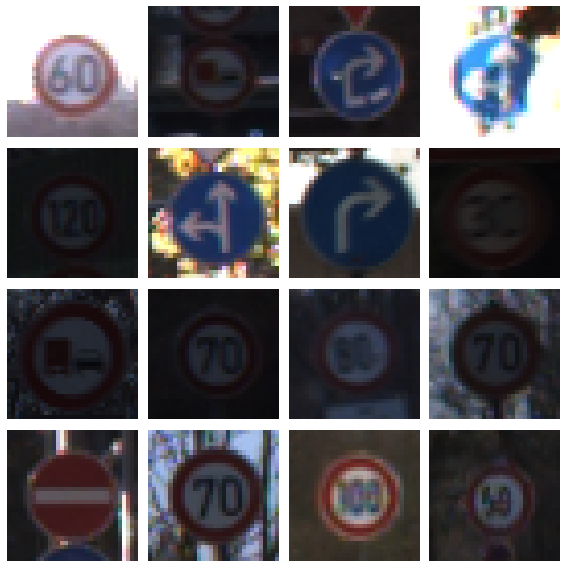

In [15]:
import matplotlib.pyplot as plt

random_index = np.random.randint(0, len(x_train), 16)    # 16개 랜덤 train 데이터 추출 

plt.figure(figsize=(8,8))

for pos in range(len(random_index)):

    plt.subplot(4,4,pos+1)
    plt.axis('off')
    train_img_index = random_index[pos]
    plt.imshow(x_train[train_img_index])

plt.tight_layout()
plt.show()

Transfer Learning base 모델 구축

In [16]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32,32,3))

17235968/17225924 [==============================] - 0s 0us/step


In [17]:
n_classes = len(os.listdir('/content/GTSRB/train/'))  # 정답 개수

model = Sequential()

model.add(base_model)

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 1, 1, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 43)                5547      
Total params: 3,365,611
Trainable params: 3,343,723
Non-trainable params: 21,888
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3), metrics=['accuracy'])

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './GTSRB_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,       # file명을 지정
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출
                             verbose=1,            # 로그를 출력
                             save_best_only=True,  # 가장 best 값만 저장
                             mode='auto'           
                            )

earlystopping = EarlyStopping(monitor='val_loss', # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )

start_time = datetime.now()

hist = model.fit(x_train, y_train, 
                 batch_size=32, epochs=30, 
                 validation_data=(x_test, y_test),
                 callbacks=[checkpoint, earlystopping])

end_time = datetime.now()

print('elapsed time => ', end_time-start_time)

Epoch 1/30
981/981 [==============================] - 60s 27ms/step - loss: 1.7836 - accuracy: 0.5021 - val_loss: 0.7262 - val_accuracy: 0.7681

Epoch 00001: val_loss improved from inf to 0.72620, saving model to ./GTSRB_MobileNet_Colab.h5
Epoch 2/30
981/981 [==============================] - 25s 25ms/step - loss: 0.6533 - accuracy: 0.8144 - val_loss: 0.4259 - val_accuracy: 0.8825

Epoch 00002: val_loss improved from 0.72620 to 0.42589, saving model to ./GTSRB_MobileNet_Colab.h5
Epoch 3/30
981/981 [==============================] - 25s 25ms/step - loss: 0.4145 - accuracy: 0.8954 - val_loss: 0.1311 - val_accuracy: 0.9609

Epoch 00003: val_loss improved from 0.42589 to 0.13111, saving model to ./GTSRB_MobileNet_Colab.h5
Epoch 4/30
981/981 [==============================] - 24s 25ms/step - loss: 0.2881 - accuracy: 0.9317 - val_loss: 0.1511 - val_accuracy: 0.9575

Epoch 00004: val_loss did not improve from 0.13111
Epoch 5/30
981/981 [==============================] - 25s 25ms/step - loss: 

In [20]:
model.evaluate(x_test, y_test)

245/245 [==============================] - 3s 12ms/step - loss: 0.0354 - accuracy: 0.9920


[0.03536011278629303, 0.991955041885376]

In [21]:
best_model = tf.keras.models.load_model('./GTSRB_MobileNet_Colab.h5')

In [22]:
best_model.evaluate(x_test, y_test)

245/245 [==============================] - 3s 12ms/step - loss: 0.0306 - accuracy: 0.9920


[0.03058905526995659, 0.991955041885376]

In [23]:
y_pred = best_model.predict(x_test)

print(y_pred.shape)

(7831, 43)


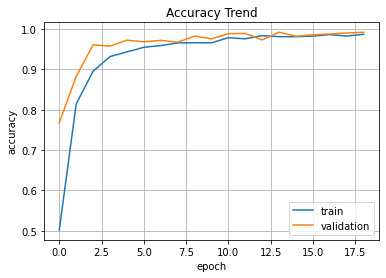

In [24]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

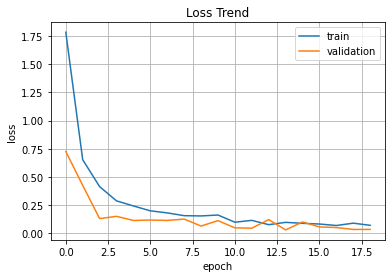

In [25]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()